In [1]:
import os
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.gridspec as grid_spec

import seaborn as sns

In [2]:
save_dir = (
    '/Users/greg/Dropbox (HMS)/Baker_QC_2021/script_output/last_minute_figures'
    '/ridgeplots')
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# paths to datasets
sardana_raw = (
    '/Volumes/T7 Shield/cylinter_input/sardana-097/'
    'output_raw/checkpoints/clustering.parquet'
    )
sardana_clean = (
    '/Volumes/T7 Shield/cylinter_input/sardana-097/'
    'output/checkpoints/clustering.parquet'
    )
topacio_raw = (
    '/Users/greg/Dropbox (HMS)/topacio/cylinter_output/TOPACIO_FINAL/'
    'output_raw/checkpoints/clustering.parquet'
    )
topacio_clean = (
    '/Users/greg/Dropbox (HMS)/topacio/cylinter_output/TOPACIO_FINAL/'
    'output_orig/checkpoints/clustering.parquet'
    )
paths = {
    'CRC_raw': sardana_raw, 'CRC_clean': sardana_clean,
    'TNBC_raw': topacio_raw, 'TNBC_clean': topacio_clean
    }

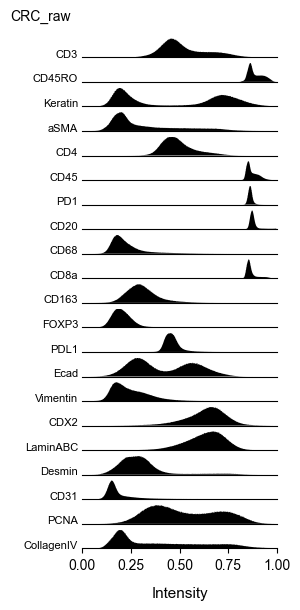

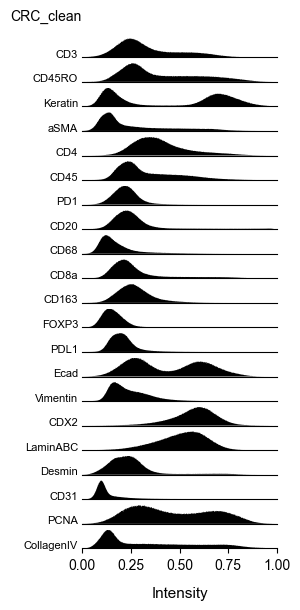

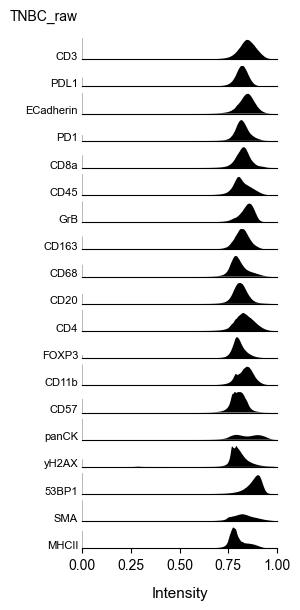

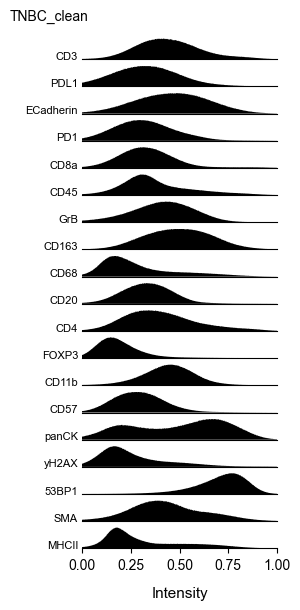

In [3]:
plt.rcParams['font.family'] = "Arial"
for name, path in paths.items():

    if 'CRC' in name:
        channels = [
            'anti_CD3', 'anti_CD45RO', 'Keratin_570', 'aSMA_660', 'CD4_488',
            'CD45_PE', 'PD1_647', 'CD20_488', 'CD68_555', 'CD8a_660',
            'CD163_488', 'FOXP3_570', 'PDL1_647', 'Ecad_488', 'Vimentin_555',
            'CDX2_647', 'LaminABC_488', 'Desmin_555', 'CD31_647', 'PCNA_488',
            'CollagenIV_647'
            ]
    elif 'TNBC' in name:
        channels = [
            'CD3', 'PDL1', 'ECadherin', 'PD1', 'CD8a', 'CD45', 'GrB',
            'CD163', 'CD68', 'CD20', 'CD4', 'FOXP3', 'CD11b', 'CD57',
            'panCK', 'yH2AX', '53BP1', 'SMA', 'MHCII'
            ]
    colors = sns.cubehelix_palette(
        len(channels), rot=-0.25, light=0.7, reverse=True
        )

    df = pd.read_parquet(path)

    gs = grid_spec.GridSpec(len(channels), 1)
    fig = plt.figure(figsize=(3, 6))

    ax_objs = []
    for i, (channel, color) in enumerate(zip(channels, colors)):

        # creating new axes object
        ax_objs.append(fig.add_subplot(gs[i:i+1, 0:]))

        # plotting the distribution
        n, bins, patches = ax_objs[-1].hist(
            df[channel], bins=700, density=True, histtype='stepfilled',
            linewidth=2.0, alpha=1.0, color='k')

        # setting uniform x and y lims
        ax_objs[-1].set_xlim(0, 1)
        ax_objs[-1].set_ylim(0, n.max())

        # make background transparent
        rect = ax_objs[-1].patch
        rect.set_alpha(0)

        # remove borders, axis ticks, and labels
        ax_objs[-1].set_yticklabels([])

        if i == len(channels)-1:
            ax_objs[-1].set_xlabel(
                'Intensity', fontsize=11, fontweight='normal', labelpad=10
                )
        else:
            ax_objs[-1].set_xticks([])
            ax_objs[-1].set_xticklabels([])

        ax_objs[-1].set_yticks([])

        spines = ['top', 'right', 'left']
        for s in spines:
            ax_objs[-1].spines[s].set_visible(False)

        if 'anti_' in channel:
            channel_update = channel.split('anti_')[1].split('_')[0]
        else:
            channel_update = channel.split('_')[0]

        ax_objs[-1].text(
            -0.02, 0, channel_update, fontweight='normal',
            fontsize=8, ha='right'
            )

    gs.update(hspace=0.3)
    plt.subplots_adjust(left=0.25, bottom=0.1, right=0.9, top=0.95)

    fig.text(0.01, 0.98, name, fontsize=10)
    
    plt.savefig(os.path.join(save_dir, f'{name}.pdf'))
    plt.show()
    plt.close('all')